### HW 7
---

**Andrew Pickner**

**I worked by myself on this assignment.**
   
---

In [1]:
'''GLOBAL IMPORTS'''

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

---

$f_{\theta}(x)=\frac{1}{1+e^{-\theta x}},\ x \in [-5, 5].$

In [2]:
f_theta = lambda x, theta: 1 / (1 + np.exp(-theta * x))

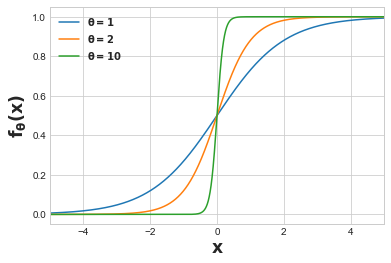

In [3]:
interval = -5, 5
xs = np.linspace(interval[0], interval[1], num=8000)

plt.plot(xs, f_theta(xs, 1), label="$\\bf{\\theta=1}$")
plt.plot(xs, f_theta(xs, 2), label="$\\bf{\\theta=2}$")
plt.plot(xs, f_theta(xs, 10), label="$\\bf{\\theta=10}$")

plt.xlim([interval[0], interval[1]])
plt.xlabel("$\\bf{x}$", fontsize='xx-large')
plt.ylabel("$\\bf{f_{\\theta}(x)}$", fontsize='xx-large')

plt.legend()

---
### 1: Generate training data

Create a vector with $n = 7$ evenly spaced points in the interval $[−5,\ 5]$. For each point $x_i$ in this vector, compute $y_i = f_{\theta}(x_i)$. You should now have 7 pairs $(x_i,\ y_i)$. Provide a printout of the 7 pairs (e.g., in a table).

---

In [4]:
# Helper functions for question #1
def generate_table(xs, ys):
    print("{:<3}| {:<23}| {:<23}\n----------------------------------------------------".format("i", "x_i", "y_i"))
    i = 1
    for i in range(len(xs)):
        print("{:<3}| {:<23}| {:<23}".format(i, xs[i], ys[i]))
        i += 1
        
def get_ys(f, xs, theta):
    ys = []
    for x in xs:
        ys.append(f(x, theta))
    return ys

In [5]:
theta = 1

train_vec = np.linspace(interval[0], interval[1], num=7, endpoint=True)
train_ys  = get_ys(f_theta, train_vec, theta)

generate_table(train_vec, train_ys)

i  | x_i                    | y_i                    
----------------------------------------------------
0  | -5.0                   | 0.0066928509242848554  
1  | -3.333333333333333     | 0.03444519566621118    
2  | -1.6666666666666665    | 0.15886910488091516    
3  | 0.0                    | 0.5                    
4  | 1.666666666666667      | 0.8411308951190849     
5  | 3.333333333333334      | 0.9655548043337889     
6  | 5.0                    | 0.9933071490757153     


---
### 2: Train the model

Construct the Vandermonde system and solve for the coefficients of the unique degree 6 interpolating polynomial $p_6(x)$. Provide a printout of the 6 coefficients.

---

$p_6(x)=\sum_{k=0}^{6}=c_k\cdot x^k$

In [6]:
vandermonde_matrix = np.vander(train_vec, increasing=True)

---

Now I have to solve for the vector that contains the coefficients.

In [7]:
cs = np.linalg.solve(vandermonde_matrix, train_ys)

print(cs)

[ 5.00000000e-01  2.33084084e-01 -4.75283111e-17 -1.08321332e-02
  4.01333175e-18  2.18209080e-04 -8.09352585e-20]


---

And we get: $p_6(x)= -8.09352585e-20x^6+2.18209080e-04x^5+4.01333175e-18x^4-1.08321332e-02x^3-4.75283111e-17x^2+2.33084084e-01x+0.5$

In [8]:
f_tilde = lambda x: (-8.09352585e-20 * (x ** 6)) + (2.18209080e-04 * (x ** 5)) + (4.01333175e-18 * (x ** 4)) + (-1.08321332e-02 * (x ** 3)) + (-4.75283111e-17 * (x ** 2)) + (2.33084084e-01 * x) + 0.5

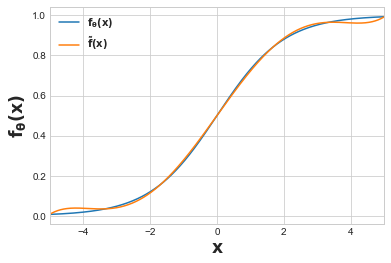

In [9]:
plt.plot(xs, f_theta(xs, theta), label="$\\bf{f_{\\theta}(x)}$")
plt.plot(xs, f_tilde(xs), label="$\\bf{\\tilde{f}(x)}$")

plt.xlim([interval[0], interval[1]])
plt.xlabel("$\\bf{x}$", fontsize='xx-large')
plt.ylabel("$\\bf{f_{\\theta}(x)}$", fontsize='xx-large')

plt.legend()

---
### 3: Generate the testing data

Create a new vector with 101 evenly spaced points in $[−5,\ 5]$. For each point $x_{i}^{'}$, compute $y_{i}^{'}=f_{\theta}(x_{i}^{'})$. Report the mean and standard deviation from the set of points $y_{1}^{'}, . . . , y_{101}^{'}$.

---

In [10]:
test_vec = np.linspace(interval[0], interval[1], num=101, endpoint=True)
test_ys  = get_ys(f_theta, test_vec, theta)


print("Mean: {}".format(np.mean(test_ys)))
print("Std.: {}".format(np.std(test_ys)))

Mean: 0.5000000000000001
Std.: 0.39019312637433506


---
### 4: Compute the testing error

Compute and report the the absolute testing error: $error = error_{\theta = 1,\ n=7} = max_{1\leq i \leq 101} \mid y_{i}^{'} − p_6(x_{i}^{'}) \mid$

---

In [11]:
# Helper functions for question #2
def get_errors(xs, ys, f_tilde):
    error = []
    for i in range(len(xs)):
        error.append(abs(ys[i] - f_tilde(xs[i])))
    return error

In [12]:
errors = get_errors(test_vec, test_ys, f_tilde)
print("Error (theta = 1): ", max(errors))

Error (theta = 1):  0.025163854763386617


---
### 5: Repeat steps 1-4 with $\theta = 10$

How does the error change? What does that tell you about the quality of the polynomial approximation for the two functions?

---
##### 1

In [13]:
theta = 10

train_vec = np.linspace(interval[0], interval[1], num=7, endpoint=True)
train_ys  = get_ys(f_theta, train_vec, theta)

generate_table(train_vec, train_ys)

i  | x_i                    | y_i                    
----------------------------------------------------
0  | -5.0                   | 1.928749847963918e-22  
1  | -3.333333333333333     | 3.338237795365011e-15  
2  | -1.6666666666666665    | 5.777748185595394e-08  
3  | 0.0                    | 0.5                    
4  | 1.666666666666667      | 0.9999999422225181     
5  | 3.333333333333334      | 0.9999999999999967     
6  | 5.0                    | 1.0                    


##### 2

In [14]:
vandermonde_matrix = np.vander(train_vec, increasing=True)
cs = np.linalg.solve(vandermonde_matrix, train_ys)

print(cs)

[ 5.00000000e-01  3.69999948e-01 -8.08372189e-17 -2.69999932e-02
  6.60579119e-18  6.47999813e-04 -1.34892097e-19]


---

Again, we get: $p_6(x)= -1.34892097e-19x^6+6.47999813e-04x^5+6.60579119e-18x^4-2.69999932e-02x^3-8.08372189e-17x^2+3.69999948e-01x+0.5$

In [15]:
f_tilde = lambda x: (-1.34892097e-19 * (x ** 6)) + (6.47999813e-04 * (x ** 5)) + (6.60579119e-18 * (x ** 4)) + (-2.69999932e-02 * (x ** 3)) + (-8.08372189e-17 * (x ** 2)) + (3.69999948e-01 * x) + 0.5

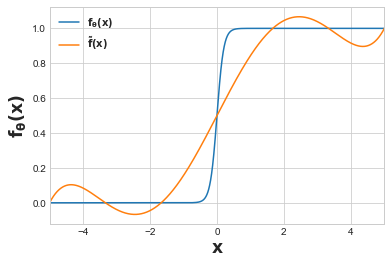

In [16]:
plt.plot(xs, f_theta(xs, theta), label="$\\bf{f_{\\theta}(x)}$")
plt.plot(xs, f_tilde(xs), label="$\\bf{\\tilde{f}(x)}$")

plt.xlim([interval[0], interval[1]])
plt.xlabel("$\\bf{x}$", fontsize='xx-large')
plt.ylabel("$\\bf{f_{\\theta}(x)}$", fontsize='xx-large')

plt.legend()

##### 3

In [17]:
test_ys = get_ys(f_theta, test_vec, theta)

print("Mean: {}".format(np.mean(test_ys)))
print("Std.: {}".format(np.std(test_ys)))

Mean: 0.5
Std.: 0.4899989875597514


##### 4

In [18]:
errors = get_errors(test_vec, test_ys, f_tilde)
print("Error (theta = 10): ", max(errors))

Error (theta = 10):  0.34230156759928765


---

The error grows. Although it is true that increasing $n$ will increase error, the error that is caused in this case is due to $\theta$. In this question, similar to #4, we use a polynomial of degree 6. As $\theta$ grows, so does our error thus our approximation isn't as good. The **EC** is the part that showcases how changing $n$ impacts the error.

---
### EC: Repeat steps 1-4 with $\theta = 10$

Repeat steps 1-4 with $\theta = 10$ and $n = 8,\ 9,\ .\ .\ .\ ,\ 15$. Plot $error_{\theta=10,\ n}$ versus $n$ on a semilog scale. How does the polynomial approximation converge as n increases?

---

In [19]:
# Helper functions to make looping through different n's simpler
def get_polynomial_ys(xs, cs):
    ys = []
    for x in xs:
        y = 0
        for i in range(len(cs)-1):
            y += cs[i] * (x ** i)
        ys.append(y)
    return ys
    
def get_errors2(ys, poly_ys):
    error = []
    for i in range(len(ys)):
        error.append(abs(ys[i] - poly_ys[i]))
    return error

Text(0, 0.5, '$\\bf{error_{\\theta=10,\\ n}}$')

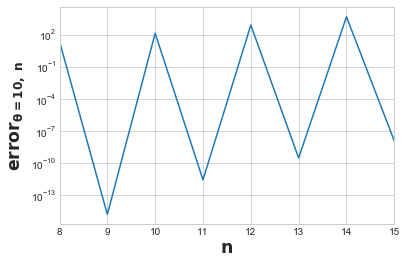

In [20]:
theta = 10

exp_range = 8, 15
n = [x for x in range(exp_range[0], exp_range[1] + 1)]
err = []

for i in n:
    train_vec = np.linspace(interval[0], interval[1], num=i, endpoint=True)
    train_ys  = get_ys(f_theta, train_vec, theta)
    vandermonde_matrix = np.vander(train_vec, increasing=True)
    cs = np.linalg.solve(vandermonde_matrix, train_ys)
    poly_ys = get_polynomial_ys(train_vec, cs)
    errors = get_errors2(train_ys, poly_ys)
    err.append(max(errors))
plt.semilogy(n, err)

plt.xlim([exp_range[0], exp_range[1]])
plt.xlabel("$\\bf{n}$", fontsize='xx-large')
plt.ylabel("$\\bf{error_{\\theta=10,\\ n}}$", fontsize='xx-large')

I did all 4 steps in one cell to make it easier to loop through $n = 8,\ .\ .\ .\ ,15$. Although this experiment helped and made it seem to converge to $\infty$, I did it with 115 trials below, and it looks to converge at $10^{13}$. Obviously as we take more and more evenly spaced points, our vandermonde matrix becomes likely more and more ill-conditioned which explains the larger error; also, the approximation typically really sucks near both the endpoints as can be seen in the plot I made for **#5**.

Text(0, 0.5, '$\\bf{error_{\\theta=10,\\ n}}$')

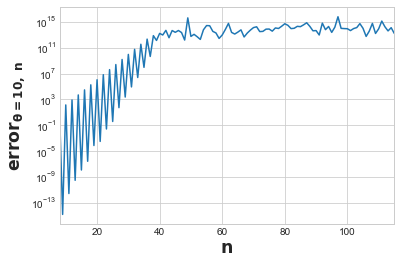

In [21]:
theta = 10

exp_range = 8, 115
n = [x for x in range(exp_range[0], exp_range[1] + 1)]
err = []

for i in n:
    train_vec = np.linspace(interval[0], interval[1], num=i, endpoint=True)
    train_ys  = get_ys(f_theta, train_vec, theta)
    vandermonde_matrix = np.vander(train_vec, increasing=True)
    cs = np.linalg.solve(vandermonde_matrix, train_ys)
    poly_ys = get_polynomial_ys(train_vec, cs)
    errors = get_errors2(train_ys, poly_ys)
    err.append(max(errors))
plt.semilogy(n, err)

plt.xlim([exp_range[0], exp_range[1]])
plt.xlabel("$\\bf{n}$", fontsize='xx-large')
plt.ylabel("$\\bf{error_{\\theta=10,\\ n}}$", fontsize='xx-large')